#  Multinomial responses

### Econometrics B (ØkB)

(Wooldridge Ch. 16)

Bertel Schjerning

Department of Economics, University of Copenhagen


## Discrete responses

*When the response variable $y$ has a finite number of outcomes*

* **Unordered response:**  
    * Binary: Labor force participation (work or not)
    * *Multinomial:* Choice of transportation (car, bus, rollerblades)

* **Ranked response:** List alternatives after attractiveness 
(prefer car to bus to rollerblades) 

* **Ordered response:** Evaluation of Lecturer (awful, acceptable, awesome) 

* **Count data:** Number of hits on a homepage, number of COVID infected, ect. 

- In this lecture, we focus on **unordered choices** 


## Today: Unordered multinomial responses
- Explain **choices between different alternatives**:
    - Levels of **education** (Msc, Bsc, High School, No education)
    - **Job types** (construction, service, clerk, research, etc.)
    - **Car brands** (Ford, Fiat, Skoda, BMW, Tesla, etc.)
- **Data**:
    - **Choice:** Msc (eg, $u^{\text{Msc}} \succ u^j$ for all other $j$)
    - **Characteristics of alternatives $x_j$** (eg, personal interests, costs, study time, expected wage, expected employment rate, etc.)
    - **Characteristics of choice maker** $x_i$ (eg, age, personal background,etc.)
- **Model:**
    - **Utility function** $u: (x_{ij},\theta) \mapsto \mathbb{R}$
    - **Estimation:** Find $\theta$ such that $u(x_{i,\text{Msc}},\theta) > u(x_{ij},\theta)$ for $j \neq \text{Msc}$.

## Extending binary choice models
- **Goal:** Extend **binary choice models** to **multiple alternatives**.

- We are interested in modeling the conditional choice probability (CCP) for a finite number of alternatives, $j\in\{0,\ldots,J\}$

$$p_j(x)=P(y=j|x) \in (0,1)$$ 


- Because alternatives are *mutually exclusive* we have that response probabilities sum to 1 

$$\sum_{j\in\{0,\ldots,J\}} p_j(x)=1$$

- So $p_0(x)=P(y=0|x)$ is determined once we know $p_j(x)$ for $j\in\{1,\ldots,J\}$

$$p_0(x)=1-\sum_{j=1}^J p_j(x)$$



### How to come up with a model for $p(x)$?
- Starting point: **Random utility models**
    - **Latent variable** representation of the model.
    - One **latent utility** underlying each possible choice.
    - Depending on the specification of the structural part, different models
    can be formed: **Conditional logit, multinomial logit, mixed logit**.
    - What are their differences?
- How **realistic** are these models?
    - The specification implies some **particular features of the model** 
    (logit for example implies *independence of irrelevant alternatives*).
    - Are these assumptions **too restrictive** or **acceptable** in practice?
    - **How can they be relaxed?**

# The Random Utility Model (RUM)

## Random utility models
**Decision rule**
$$y_i = \arg \max_{j\in\{0,\ldots,J\}} u_{ij}
\qquad\qquad
u_{ij} = v_{ij} + \varepsilon_{ij}$$

- $i,j$: **individual** $i=1,\ldots,N$, and **alternative** $j=0,\ldots,J$.
- $y_i\in\{0,\ldots,J\}$: **alternative chosen** by individual $i$.
- $u_{ij}$: **utility** derived from choosing alternative $j$ for individual $i$.
- $v_{ij}$: **observed components** (*deterministic* part).
- $\varepsilon_{ij}$: **error term** (*stochastic* part) - observed by decision maker, but not by econometrician.

**Primary classes**
- **Logit:** $\varepsilon_{ij}$ is additive and iid extreme value distributed
- **Conditional logit:** $v_{ij} = x_{ij}\beta$
- **Multinomial logit:** $v_{ij} = x_{i}\beta_j$
- **Mixed logit** (confusing term): $v_{ij} = z_{ij}'\beta + w_{i}\gamma_j$

##  More on utility
Observed components of utility, $v_{ij}=v\left( w_i,z_{ij}\right)$ does not have to be a linear function

For example: 
- an *indirect utility* function in a static optimization problem that involves other choices, $c$
$$v_{ij}= \max_c (\tilde{v}_{ij}(c))$$

- a *choice specific value function* from a dynamic discrete choice problem
$$v\left(x, j\right) = \tilde{u}(x,j) + \rho \int V(x')p(x'|x,j)) $$
where $V(x)=\int_\varepsilon  \max_j(v(x,j)+\varepsilon_j)d\varepsilon=\log(\sum_j\exp(v(x,j)))$ is the expected value function, $\rho$ is the time discount factor, $p(x'|x,j)$ is the transition density for the state variables $x$ and



### Conditional vs. multinomial logit

**Conditional logit (CL)**  
- $x_{ij}$: $1xK$ vector of characteristics of *alternative* j for individual $i$
- **Example:** Education choice
$$x_{ij} = (\texttt{Const}_{j}, \texttt{Costs}_{ij},\texttt{StudyTime}_{ij}, \texttt{ExpectedWage}_{ij}, \ldots)$$
- **Normalization:** No choice invariant intercepts and fixed scale. 
- $\beta_k$ interpretation: marginal utility of $x_k$.

**Multinomial logit (MNL)** 
- $x_i$: $1xK$ vector of characteristics of the *individual*
- **Example:** Education choice, $x_i = (\texttt{Age}_i, \texttt{ParentsEduc}_i, \ldots)$.
- **Normalization:** baseline alternative required, eg, $\beta_0=0_{K \times 1}$.
- $\beta_{jk}$ interpretation: utility dependence on $x_i^k$ for alternative $j$
relative to baseline alternative.

## Choice probabilities
- Remember:
$$y_i = \arg \max_{j\in\{0,\ldots,J\}} u_{ij}
\qquad\qquad
u_{ij} = v_{ij} + \varepsilon_{ij}$$
- Therefore:
$$\begin{array}{lcl}
p_{ij} \equiv P(y_i = j) 
&=& P(u_{ij} > u_{ik} \quad\forall k\neq j) \\[1ex]
&=& P(v_{ij} + \varepsilon_{ij} > v_{ik} + \varepsilon_{ik} \quad\forall k\neq j) \\[1ex]
&=& P(\varepsilon_{ik}-\varepsilon_{ij} < v_{ij}-v_{ik} \quad\forall k\neq j) \\[1ex]
\end{array}$$

- The expression of $p_{ij}$ depends on the **distributional assumption** on the 
error term of the random utility model:
    - How to choose the distribution of $\varepsilon_{ij}$? 
    - What will be the implied distribution of $\varepsilon_{ik}-\varepsilon_{ij}$?

## Error term distribution
**Definition: Type 1 Extreme Value distribution**
- Also called (standard) **'Gumbel distribution'**.
- **Cumulative density** and **probability density** functions:

$$\begin{array}{lcl}
F(\varepsilon) &=&
\exp\left\{-\exp\{-\varepsilon\}\right\} \\[1em]
f(\varepsilon) &=& 
\exp\left\{-\varepsilon-\exp\{-\varepsilon\}\right\}
\end{array}$$


**Gumbel distribution:**
- Limiting distribution ($N \rightarrow \infty$) of the 
maximum of $N$ random variables drawn from the same distribution.
- Popular for predicting **extreme events** (eg, *earthquakes*)
- **Why use this peculiar distribution?**

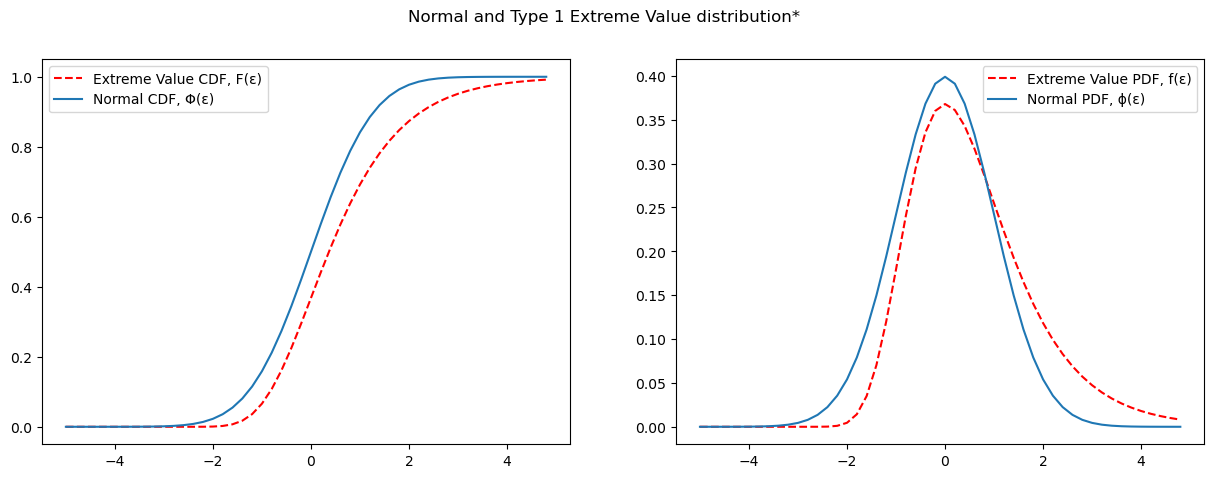

In [1]:
# Type 1 Extreme Value distribution**
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

ε = np.arange(-5, 5., 0.2)
F = lambda ε :  np.exp(-np.exp(-ε))
f = lambda ε :  np.exp(-ε -np.exp(-ε))
Φ = lambda ε :  norm.cdf(ε)
ϕ = lambda ε :  norm.pdf(ε)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Normal and Type 1 Extreme Value distribution*')
ax1.plot(ε, F(ε), 'r--', ε, Φ(ε))
ax1.legend(['Extreme Value CDF, F(ε)',  'Normal CDF, Φ(ε)'])
ax2.plot(ε, f(ε), 'r--', ε, ϕ(ε))
ax2.legend(['Extreme Value PDF, f(ε)',  'Normal PDF, ϕ(ε)'])
plt.show()

### Distribution skewed to the right *(is this a problem?)*:
<img src="img/evdist.png" width="900" height="400">

**Property: Type 1 extreme value distribution**
- If $\varepsilon_j \sim \text{GEV}$, $\varepsilon_k \sim \text{GEV}$
and $\varepsilon_j$ is independent of $\varepsilon_k$, then
$\varepsilon_j - \varepsilon_k \sim Logistic$.
- This property is used to derive the **binary logit model** in the two-choice case.
- The GEV distribution is **max stable**, so that maximum of n iid
GEV distributed variables with parameters are also
GEV-distributed with the shape parameter unchanged.



## Choice Probability
For additive random utility models, we get

$$\begin{array}{lcl}
p_{ij}  
&=&P\left(u_{ij}>u_{im},\forall m\neq j\right) \\
&=&P\left(v_{ij}+\varepsilon _{ij}>v_{im}+\varepsilon _{im},\forall m\neq j\right) \\
&=&\int_{\varepsilon_{i0},\dots,\varepsilon_{iJ}}\mathbb{1}\left( \varepsilon_{im}-\varepsilon_{ij}<v_{ij}-v_{im},\forall m\neq j\right) \\
&&\quad f\left( \varepsilon_{i0},\dots,\varepsilon_{iJ}\right) d\varepsilon_{i0}\dots d\varepsilon_{iJ}\end{array}$$

- In the general case we need to evaluate a multi-dimensional integral over the unobserved portion of utility. 

- The dimensionality is often reduced by one dimension by considering the distribution of error differences so that the integral is $J-$dimensional

- If we have panel data so that $\varepsilon_{ij}$ is a $T$ vector, the size of the integral increase by a factor T if we do not assume independence over time 

### Logit: "Closed form" choice probabilities
If we assume $\varepsilon _{i0},\dots,\varepsilon _{iJ}$ are **i.i.d. type I extreme value distributed**, we obtain logit choice probabilities
$$
p_{ij} =P(v_{ij}+\varepsilon _{ij}>v_{im}+\varepsilon _{im},\forall m\neq j) 
$$

If we condition on $\varepsilon _{ij}$ we obtain
$$
p_{ij}|\varepsilon _{ij} =P(\varepsilon _{im}<v_{ij}-v_{im}+\varepsilon _{ij},\forall m\neq j | \varepsilon _{ij})
$$

Since $\varepsilon _{im}$ are independent across alternatives we can write
$$p_{ij}|\varepsilon _{ij} =\prod_{m\neq j}e^{-e^{-( \varepsilon_{ij}+v_{ij}-v_{im})}}
$$

So that we obtain a 1-dimensional integral of exponential functions
$$
p_{ij} =\int_{\varepsilon _{ij}}\left(\prod_{m\neq j}e^{-e^{-( \varepsilon_{ij}+v_{ij}-v_{im} )}}\right)
e^{-\varepsilon_{ij}-e^{(- \varepsilon_{ij})}}
d\varepsilon _{ij}
$$

With a closed form solution (See next slide):
$$
p_{ij} = \frac{1}{\sum_{m=0}^{J}\exp(v_{im}-v_{ij})} = \frac{\exp(v_{ij})}{\sum_{m=0}^{J}\exp(v_{im})} 
$$


## Soving the integral
Noting that $v_{ij}-v_{ij}=0$ and collecting terms we get
$$
\begin{array}{lcl}
p_{ij} &=&\int_{-\infty}^{\infty}\left(\prod_{m}e^{-e^{-( \varepsilon_{ij}+v_{ij}-v_{im} )}}\right)
e^{-\varepsilon_{ij}}
d\varepsilon _{ij}\\
 &=&\int_{-\infty}^{\infty}\exp(-\sum_{m}\exp(-(\varepsilon_{ij}+v_{ij}-v_{im} ))
e^{-\varepsilon_{ij}}
d\varepsilon _{ij}\\
 &=&\int_{-\infty}^{\infty}\exp(-e^{-\varepsilon_{ij}}\sum_{m}\exp(-(v_{ij}-v_{im} ))
e^{-\varepsilon_{ij}}
d\varepsilon _{ij}\\
 &=&\int_{-\infty}^{\infty}\exp(-t\sum_{m}\exp(-(v_{ij}-v_{im} ))(-dt)\\
&=&\frac{\exp(v_{ij})}{\sum_{m=0}^{J
}\exp(v_{im})} 
\end{array}
$$
Define $t=e^{-\varepsilon_{ij}}$ such that $dt=-e^{-\varepsilon_{ij}}d\varepsilon_{ij}$  and note that $\lim_{\varepsilon_{ij} \rightarrow \infty}e^{-\varepsilon_{ij}}=0$. We then have
$$
\begin{array}{lcl}
p_{ij} 
&=&\int_{-\infty}^{0}\exp(-t\sum_{m}\exp(-(v_{ij}-v_{im} ))(-dt)\\
&=&\int_{0}^{\infty}\exp(-t\sum_{m}\exp(-(v_{ij}-v_{im} ))dt\\
&=&\left[\frac{\exp(-t\sum_{m}\exp(-(v_{ij}-v_{im} ))}{-\sum_{m}\exp(-(v_{ij}-v_{im} )}\right]_{0}^{\infty}\\
&=&\frac{1}{\sum_{m=0}^{J}\exp(v_{im}-v_{ij})} = \frac{\exp(v_{ij})}{\sum_{m=0}^{J}\exp(v_{im})} 
\end{array}
$$

# Estimation and data

## Data 
**Random sampling** 
- Sample of size $N$ where unit $i$ is randomly sampled
    - $(y_i,x_{ij})$ is a random draw from the population
    - With panel data where $y_i$ is a Tx1 vector and $x_{ij}$ is a Txk matrix with rows $x_{itj}$. 
    - For panel data, we assume random sampling over $i$, but not over $t$

**Data collection**

- **Revealed preference data** (survey, register)
    * observe what people actually do 
- **Stated preference data** (survey)
    * observe what people say they will do in hypothetical choice situations
    * very common in marketing

## Likelihood function
- To derive the **likelihood**, all **alternative specific probabilities** are needed.
- To simplify notation we abstract from $x$
- Define $d_{ij} = \mathbb{1}(y_i=j)$, such that $\sum_{j=0}^J d_{ij}=1$.
- **Probability of choosing alternative $j$:**
$$p_{ij} \equiv P(y_i = j) = P(d_{ij} = 1, d_{ik}=0\,\,\forall k\neq j)$$
- **Individual likelihood and log-likelihood:**
$$\begin{array}{lcl}
L_i(\theta) &=& \displaystyle\prod_{j=1}^J p_{ij}^{d_{ij}} \\[1em]
\mathcal{L}_i(\theta) &\equiv& \ln L_i(\theta) =
  \displaystyle\sum_{j=0}^J d_{ij} \ln p_{ij}
\end{array}$$
- **How to specify $p_{ij}$?**


## Likelihood
General expression of $p_{ij}$, for $j=1,\ldots,J$:
$$\begin{array}{lclcl}
\text{CL:}    &\quad& p_{ij} &=& \dfrac{\exp\{x_{ij}\beta\}}
                                 {\sum_{k=0}^J\exp\{x_{ik}\beta\}} \\[1em]
\text{MNL:}   && p_{ij} &=& \dfrac{\exp\{x_{i}\beta_j\}}
                                 {\sum_{k=0}^J\exp\{x_{i}\beta_k\}} \\[1em]
\text{Mixed:} && p_{ij} &=& \dfrac{\exp\{z_{ij}\beta+w_{i}\gamma_j\}}
                                 {\sum_{k=0}^J\exp\{z_{ik}\beta+w_{i}\gamma_k\}} \\[2em]
\end{array}$$

Corresponding **individual log-likelihood**, eg in the **conditional logit**:

$$\mathcal{L}_i(\beta) = 
  \underbrace{\left(\sum_{j=1}^J d_{ij} x_{ij}\beta\right)}_{=x_{iy_i}\beta} - 
  \ln\left(\sum_{k=0}^J\exp\{x_{ik}\beta\}\right)$$

# Identification

## Identification
- **Latent variables** can be **transformed** without 
changing the likelihood function.
- This creates **identification problems** in latent variable models.
- **Solution:** Impose **parameter restrictions** to prevent such 
transformations from happening.
- **Example:** In the probit model, we achieved identification by fixing
$\mu=0$ and $\sigma^2=1$ for the error term.
- What are the **potential identification problems** in the **random utility model**?

### RUM Example: Choice of transportation mode
\begin{eqnarray*}
y_{C}^{*} &=&\alpha _{C}+\delta _{C}p_{C}+\gamma _{C}I+\varepsilon _{C} \\
y_{T}^{*} &=&\alpha _{T}+\delta _{T}p_{T}+\gamma _{T}I+\varepsilon _{T}
\end{eqnarray*} 

- $p_{j}$; Alternative specific price per trip 
- $I$; Income (individual specific) 
- $\varepsilon_{j}$ Unobserved by researcher, observed by decision maker 
	- **Taste shiftier:** Some people prefer the car, while others prefer train 
	- **Idiosyncratic shocks:** Car engine makes weird noises and start to smoke, son/daughter borrows the car, train personnel strikes, etc.


### RUM Example: Choice of transportation mode
**Random Utility**
\begin{eqnarray*}
y_{C}^{*} &=&\alpha _{C}+\delta _{C}p_{C}+\gamma _{C}I+\varepsilon _{C} \\
y_{T}^{*} &=&\alpha _{T}+\delta _{T}p_{T}+\gamma _{T}I+\varepsilon _{T}
\end{eqnarray*} 

**Decision rule:** 
\begin{eqnarray*}
	&&y_{C}^{*}-y_{T}^{*}:\ \ \ \ \left\{\begin{array}{l}
>0\rightarrow \text{Car} \\
{<0\rightarrow \text{Train}} \end{array} \right.  \\
	y_{C}^{*}-y_{T}^{*} &=&  \left( \alpha _{C}-\alpha _{T}\right)  
 +\delta _{C}p_{C}-\delta _{T}p_{T} 
+\left( \gamma _{C}-\gamma _{T}\right) I 
+\left( \varepsilon _{C}-\varepsilon _{T}\right)
\end{eqnarray*}

**Observed outcome**
\begin{eqnarray*}
y &=&1\text{ if Car is chosen}  \\
y &=&0\text{ if Train is chosen} 
\end{eqnarray*}


### RUM example: Identification

\begin{equation*}
\beta =\left(\begin{array}{c}
\beta _{1} \\ \beta _{2} \\ \beta _{3} \\ \beta _{4}
\end{array}\right)
= \left( 
\begin{array}{c}
\alpha _{C}-\alpha _{T} \\ \delta _{C} \\ -\delta _{T} \\ \gamma _{C}-\gamma _{T}
\end{array}\right) 
\text{ , where }x
=\left( \begin{array}{c}
1 \\ p_{C} \\ p_{T} \\ I
\end{array}\right), \text{  }\tilde{\varepsilon}=\varepsilon _{C}-\varepsilon _{T}
\end{equation*}

For this binary choice we can summarize the model by the (latent) utility difference

\begin{equation*}
\tilde{y}^{*}=y_{C}^{*}-y_{T}^{*}=x^{\prime }\beta +\tilde{\varepsilon}
\end{equation*}

If $\tilde{\varepsilon}$ is normally distributed we can estimate this equation by a probit of $y$ on $x$

- $\beta $ is identified up to a scale factor (normalization required)
- Given scale normalization, unidentified quantities are: $\theta =\left \{ \left( \alpha _{C}-\alpha
_{T}\right) ,\delta _{T},\delta _{C},\left( \gamma _{C}-\gamma _{T}\right)
\right \} $


## Identification: Conditional logit
- **Location problem:**

$$\begin{array}{lcl}
p_{ij}
&=&\dfrac{\exp\{\color{red}{\beta_0} + x_{ij}\beta\}}
         {\sum_{k=0}^J\exp\{\color{red}{\beta_0} + x_{ik}\beta\}} \\[0.5em]
&=&\dfrac{\color{red}{\exp\{\beta_0\}}\exp\{x_{ij}\beta\}}
         {\sum_{k=0}^J\color{red}{\exp\{\beta_0\}}\exp\{x_{ik}\beta\}} \\[0.5em]
&=&\dfrac{\exp\{x_{ij}\beta\}}
         {\sum_{k=0}^J\exp\{x_{ik}\beta\}}
\end{array}$$


- **Solution:** Intercept term needs to be fixed to $\beta_0=0$.
- Otherwise, it is possible to **shift all utilities**
(ie, add an arbitrary constant) without changing the likelihood.

## Identification: Multinomial logit
- **Similar problem:**
$$\begin{array}{lcl}
p_{ij}
&=&\dfrac{\exp\{x_{i}(\beta_j+\color{red}{\delta})\}}
         {\sum_{k=0}^J\exp\{x_{i}(\beta_k+\color{red}{\delta})\}} \\[.5em]
&=&\dfrac{\color{red}{\exp\{x_i\delta\}}\exp\{x_{i}\beta_j\}}
         {\sum_{k=0}^J\color{red}{\exp\{x_i\delta\}}\exp\{x_{i}\beta_k\}} \\[0.5em]
&=&\dfrac{\exp\{x_{i}\beta_j\}}
                                 {\sum_{k=0}^J\exp\{x_{i}\beta_k\}}
\end{array}$$

- **Solution:** Define a **baseline alternative $j$** (usually the first one) 
and set $\beta_j=0$.
- This **normalization** (ie, *identification restriction*) implies that the
coefficients are always measured *with respect to the baseline category*.

## Identification: Mixed logit
- As the mixed logit combines both CL and MNL, it is **affected by both 
problems**.
- **Solution:** **Fix coefficients of baseline category** (eg, $\beta_0=0$) and 
**drop any fixed intercept term across alternatives*.
- Alternative-specific intercept terms are allowed, as long as the intercept of
the baseline category is fixed to 0.

## Identification: Scale of utility is irrelevant
- Suppose we had the model with extreme value type I errors
$$y_i = \arg \max_{j\in\{0,\ldots,J\}} u_{ij}
\qquad\qquad
u_{ij} = x_{ij}\beta + \color{red}{\sigma}\varepsilon_{ij}$$

- Implied logit ccp's are

$$\begin{array}{lcl}
p_{ij}
&=&\dfrac{\exp\{x_{i}(\beta_j/\color{red}{\sigma})\}}
         {\sum_{k=0}^J\exp\{x_{i}(\beta_k/\color{red}{\sigma})\}} \\[.5em]
\end{array}$$

- Need the usual scale normalization estimate the variance of the error terms $\varepsilon_{ij}$
- **Solution** Usually we make the normalization $\sigma=1$




## Key takeaway on identification 
In random utility models for unordered discrete choices
1. **Scale of utility is irrelevant**
2. **Only differences in utility matter**

# Features of interest

## Marginal effects
Usually we are not interested in $\beta$s directly, but in marginal effects:

**Conditional logit:** 
$$p_{ij} = \dfrac{\exp\{x_{ij}\beta\}}
                                 {\sum_{k=0}^J\exp\{x_{ik}\beta\}} \\[1em]
$$

Marginal effects wrt alternative-specific covariates $x_{ik}$

$$\frac{\partial}{\partial x_{ik}}P({y_i=j \mid x_i})
\quad=\quad p_{ij}\left(\mathbb{1}(k=j)-p_{ik}\right)\beta$$


**Multinomial logit:** 
$$
p_{ij} = \dfrac{\exp\{x_{i}\beta_j\}}
                                 {\sum_{k=0}^J\exp\{x_{i}\beta_k\}} \\[1em]
$$

Marginal effects wrt fixed covariate $x_i$

$$\frac{\partial}{\partial x_i}P(y_i=j \mid x_i)
\quad=\quad p_{ij}\left(\beta_j-\sum_{l=0}^J p_{il}\beta_l\right)$$



## Marginal effects
- **Standard errors** obtained via the **Delta method** or **bootstrap**.
- Since probabilities sum up to 1 across alternatives, **marginal effects in the conditional logit sum up to 0**


### Note: Market shares
- When using logit models to estimate consumption decisions, 
 **average choice probabilities** represent **market shares**:
$$s_j = \frac{1}{N}\sum_{i=1}^N\mathbb{1}({y_i=j})
\qquad\stackrel{N\rightarrow\infty}{\rightarrow}\quad P(y=j)$$
- So **average marginal effects** measure how **market shares** change.



## Regression using market share data
- We can estimate $p_{mj}$ using the choice data

- If we equate observed market shares, $s_{mj}$ with logit probabilities we get

$$s_{mj} = \dfrac{\exp\{x_{mj}\beta\}}
                                 {\sum_{k=0}^J\exp\{x_{mk}\beta\}} \\[1em]
$$

- Easy to transform the choice probabilities for the logit model

$$
log(s_{mj})-log(s_{m0}) = (x_{mj}-x_{m0})\beta
$$

So we can estimate the logit model on market sahre data using simple regression methods

## MNL: Parameter interpretation
- **Warning:** Marginal effect is a complicated function of $\beta_j$.
- The **sign** of the marginal effect is *not* determined by $\beta_j$ alone!
- Instead, consider **log odds ratio** wrt normalized alternative:

### Log odds ratio
$$\ln\frac{P(y_i=j\mid x_i)}{P(y_i=1\mid x_i)} 
= \ln\frac{\frac{\exp\{x_i\beta_j\}}{\sum_{l=1}^J\exp\{x_i\beta_l\}}}
          {\frac{\exp\{x_i\beta_1\}}{\sum_{l=1}^J\exp\{x_i\beta_l\}}}
= x_i\beta_j$$

- Measures the change in relative risk when $x_i$ changes by one unit.
- Linear in $x_i$. This is why some software report (log) odds ratios.

### Replicate Table 16.1: School and Employment Decision of Young Men
See Wooldridge(2010, p. 645)

Read in keane.dta estimate MNL for employment status (0: school, 1: home, 2: work)

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_stata('keane.dta')
df=df[df['year']==87].dropna(subset=['status', 'educ', 'exper', 'expersq', 'black'])
x=['educ', 'exper', 'expersq', 'black']
y=['status'] 
# status (0: school, 1: home, 2: work)
df[y].value_counts()
#df

status
2.0       1286
1.0        332
0.0         99
dtype: int64

In [3]:
# Estimimate MNL
mnl_keane=sm.MNLogit(df[y], sm.add_constant(df[x]))
result=mnl_keane.fit()
print('\nstatus: 0=school, 1=home, 2=work\n\n', result.summary())

Optimization terminated successfully.
         Current function value: 0.528746
         Iterations 8

status: 0=school, 1=home, 2=work

                           MNLogit Regression Results                          
Dep. Variable:                 status   No. Observations:                 1717
Model:                        MNLogit   Df Residuals:                     1707
Method:                           MLE   Df Model:                            8
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                  0.2433
Time:                        10:11:43   Log-Likelihood:                -907.86
converged:                       True   LL-Null:                       -1199.7
Covariance Type:            nonrobust   LLR p-value:                7.383e-121
  status=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2779      1.133      9.069      0.000       8.057      

In [4]:
# Marginal effects
margeff=result.get_margeff()
print('status: 0=school, 1=home, 2=work\n\n', margeff.summary())

status: 0=school, 1=home, 2=work

        MNLogit Marginal Effects      
Dep. Variable:                 status
Method:                          dydx
At:                           overall
  status=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0174      0.003      5.981      0.000       0.012       0.023
exper         -0.0313      0.007     -4.629      0.000      -0.045      -0.018
expersq        0.0030      0.001      2.937      0.003       0.001       0.005
black         -0.0184      0.013     -1.435      0.151      -0.043       0.007
------------------------------------------------------------------------------
  status=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0429      0.003    -14.312      0.000      -0.049      -0.037
exper         -0.1006  

### Some additional features of interest
- welfare 
- marginal utility of money
- willingness to pay
- money metric consumer/producer surplus
- own-price and cross-price elasticities

### Maximal expected utility - the "log-sum"
- The maximal attainable utility is $\max_j(u_{it})=\max_j(v_{it}+\varepsilon_{it})$
- Since the researcher do not observe $\varepsilon_{it}$ we often compute the the expected welfare which has a closed form in the logit case
$$
\mathbb{E}_{\varepsilon_{01},...,\varepsilon_{iJ}}\left[\max(v_{ij}+\varepsilon_{ij})\right]=\log\left[\sum_{j=0}^{J}\exp(v_{ij})\right].
$$
This is some times referred to as the "log-sum" or the "smooth max operator". If we scale $\varepsilon_{it}$ with $\sigma$ we obtain
\begin{eqnarray*}
 \mathbb{E}_{\varepsilon_{01},...,\varepsilon_{iJ}}\left[\max(v_{ij}+\sigma\varepsilon_{ij})\right]
&=& \sigma\log\left[\sum_{j=0}^{J}\exp(v_{ij}/\sigma)\right] \\
&=& \max_j v_{ij} + \sigma\log\left[\sum_{j=0}^{J}\exp((v_{ij}-\max_j  v_{ij})/\sigma)\right] 
\end{eqnarray*}
- From the last term we see that $\varepsilon_{it}$ always adds positively to expected utility if $\sigma>0$. 
- This effect is increasing in number of alternatives, so logit implies that consumers have a love of variety.
- We also see that the log-sum converges to the max as $\sigma \rightarrow 0$ 
$$
\lim_{\sigma \rightarrow 0}\sigma\log\left[\sum_{j=0}^{J}\exp(v_{ij}/\sigma)\right]= \max_j v_{ij} 
$$

### Log-sum: The smooth-max operator:
<p float="center">
    <img src="img/max.png" width="500"/>
    <img src="img/logsum.png" width="500"/>
</p>



### Money metric welfare analysis and willingness to pay
How to express welfare and substitution in monetary terms? 

Suppose we have the following specification of indirect utility
$$
u_{ij}=\delta_p p_{j} + \delta_z z_{j} + \varepsilon_{ij}
$$
where $p_{j}$ is the price of good $j$ and $z_{j}$ is some other attribute of the good. 

- The price response, $du_{it}/dp_j=\delta_p$, is also a measure of **the marginal utility of money**
- We can then use the price parameter to compute expected **money metric consumer surplus (CS)** by translating welfare form utility units to monetary units
$$
E(CS)=1/\delta_p\log\left[\sum_{j=0}^{J}\exp(\delta_p p_{j} + \delta_z z_{j} )\right] + C.
$$
- Now consider a change in prices and attributes that holds utility constant $$du_{ij}=\delta_p dp_{j} + \delta_x dz_{j} = 0$$
- Here $\text{wtp}=dp_{j}/dz_{j}=-\delta_z/\delta_p$ measures the **willingness to pay** for increase in $z$
- Price responses for normal goods are negative, so $\text{wtp}>0$ if $\delta_x>0$


###  Elasticities for conditional logit
Economist are often interested in measuring the response in terms of elaticities, since they are normalized for the variable's units

- The elasticity of $p_{ij}$ wrt to a change alternative-specific attribute $x_{ik}$ is

$$E_{j, x_{ik}}= \frac{x_{ik}}{p_{ij}}\frac{\partial p_{ij}}{\partial x_{ik}}
\quad=\quad \frac{x_{ik}}{p_{ij}}  p_{ij}\left(\mathbb{1}(k=j)-p_{ik}\right)\beta 
\quad=\quad \left(\mathbb{1}(k=j)-p_{ik}\right) x_{ik}\beta $$
- **The cross-price elasticity** (i.e. when $k\ne j$) is completely independent of $j$
$$E_{j, x_{ik}}= 
\quad=\quad -p_{ik} x_{ik}\beta $$
- We see that a change in an attribute of alternative $k$ changes demand for all other goods by the same percentage
- This is a result of substitution patters imposed by logit which reflects the so-called **independence of irrelative alternatives (IIA)** property





# Independence of irrelative alternatives (IIA)


## Independence of irrelevant alternatives (IIA)
- Conditional logit model:
$$\frac{P(y=j \mid x)}{P(y=k \mid x)} 
= \frac{\exp\{x_j\beta\}/\sum_l\exp\{x_l\beta\}}
       {\exp\{x_k\beta\}/\sum_l\exp\{x_l\beta\}}
= \exp\{(x_j-x_k)\beta\}$$
- **Ratio of probabilities** of two alternatives does *not* depend on **remaining alternatives**.
- This is called the **IIA property**.
- This implies that the **odds ratio** (relative prob.) does *not* depend on:
    - $x_l$ for any $l \neq j,k$.
    - the size of the choice set.
- **Implication:** Restricts **substitution patterns**.
- **How realistic is this (implied) assumption? Good or bad?**

## IIA Example 1: Blue bus/red bus example
- Assume two ways of commuting: red bus or car.
- Equally likely to be chosen by people:
$$P(\text{red bus})=P(\text{car})=0.5 
\qquad\Rightarrow\qquad
\frac{P(\text{red bus})}{P(\text{car})}=1$$
- Now, add a blue bus: *identical* to red bus (up to color).
- New problem:
$$
\begin{cases}
P(\text{blue bus})=P(\text{red bus}) &\quad \text{[identical buses]} \\
P(\text{red bus})/P(\text{car})=1 &\quad \text{[must hold (IIA)]}\\
P(\text{car})+P(\text{blue bus})+P(\text{red bus})=1 &\quad \text{[prob. sum to 1]}
\end{cases}$$
- Only one solution: $P(\text{car})=P(\text{blue bus})=P(\text{red bus})=1/3$.
-We would expect $P(\text{car})=0.5$, $P(\text{blue bus})=P(\text{red bus})=0.25$.


**Counterintuitive solution implied by IIA!**




## IIA Example 2: Car example
- Suppose $y \in \{0,\ldots,J\}$ denotes **car type** whose attributes are
$x_j=(\text{price}_j,\text{size}_j)$.
- Assume that **price of car $J$ increases**: 
$x_{J}^{\text{new}} = x_{J} + \Delta$
- **Change in probability** (ie, *market share*) **for all other cars 
$k \neq J$** are **changed similarly**:
$$\begin{array}{lcl}
P(y=k \mid x^{\text{new}}) 
&=& \dfrac{\exp\{x_k'\beta\}}
         {\exp\{\beta_1\Delta\}\exp\{x_J\beta\}+\sum_{j\neq J}\exp\{x_j\beta\}} \\[2em]
&=& 1/\rho \cdot P(y=k \mid x^{\text{old}})
\end{array}$$
with: 
$\rho=\left(\exp\{\beta_1\Delta\}\exp\{x_J\beta\}+\sum_{j\neq J}\exp\{x_j'\beta\}\right)/\left(\sum_{j}\exp\{x_j\beta\}\right)$



- $\log(\rho)$ measures the change in consumer surplus after the price change
- **How realistic is it that all market shares are impacted proportionally by the same $\rho$?**


## Concluding remarks: Possible extensions
- **IIA assumption** comes from the **independence** of the error terms.
- **Independence of the error terms** is required to build
conditional/multinomial/mixed logit models.
- In practice, **IIA can be tested** (eg, Hausman test).
- **How to do better in practice?**
- Relax independence:
    - **Nested logit:** Allow correlation within groups of alternatives.
    - **Multinomial probit:** Assume a multivariate normal distribution on the
    error terms.
    - Random coefficients logit
- **Panel data:**  Random effects
   